C:\Users\rpjun\AppData\Local\Temp\ipykernel_18560\820024310.py:13: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dados['Data'] = pd.to_datetime(dados['Data'])


Erro quadrático médio (MSE) - Regressão Linear: 1.89
Coeficiente de determinação (R²) - Regressão Linear: 0.94
MSE médio (validação cruzada) - Regressão Linear: 3.55
MSE de cada fold - Regressão Linear:  [13.19142679  1.56818514  0.64642675  0.42602621  1.89509508]


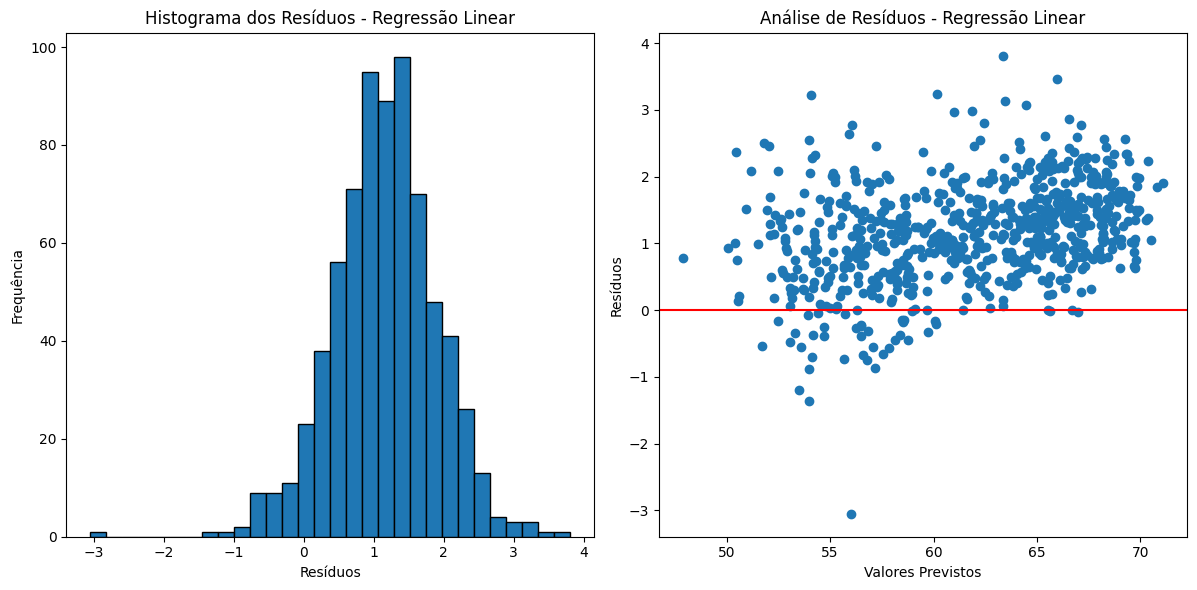

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import plotly.express as px

# Carregar os dados
url = 'https://raw.githubusercontent.com/Rogeriom49/4DTAT/main/techChallange2/datasets/Ibovespa14anos.csv'
dados = pd.read_csv(url)
dados['Data'] = pd.to_datetime(dados['Data'])
dados.set_index('Data', inplace=True)

# Criar novas features
dados['Dias'] = (dados.index - dados.index[0]).days
dados['Retorno'] = dados['Último'].pct_change()
dados['Retorno'] = dados['Retorno'].fillna(0)
dados['MediaMovel_5'] = dados['Último'].rolling(window=5).mean()
dados['MediaMovel_5'] = dados['MediaMovel_5'].fillna(dados['MediaMovel_5'].mean())

# Selecionar as features e a variável alvo
features = ['Dias', 'Retorno', 'MediaMovel_5']
X = dados[features]
y = dados['Último']

# Normalizar as features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Criar e treinar o modelo de regressão linear
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Fazer previsões
previsoes_lr = modelo_lr.predict(X_test)

# Avaliar o modelo de regressão linear
print("Erro quadrático médio (MSE) - Regressão Linear: %.2f" % mean_squared_error(y_test, previsoes_lr))
print("Coeficiente de determinação (R²) - Regressão Linear: %.2f" % r2_score(y_test, previsoes_lr))

# Validação cruzada
scores_lr = cross_val_score(modelo_lr, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores_lr = -scores_lr  # Convertendo para valores positivos
print("MSE médio (validação cruzada) - Regressão Linear: %.2f" % mse_scores_lr.mean())
print("MSE de cada fold - Regressão Linear: ", mse_scores_lr)

# Análise de Resíduos - Regressão Linear
residuos_lr = y_test - previsoes_lr

plt.figure(figsize=(18, 6))

# Gráfico 1: Histograma dos resíduos - Regressão Linear
plt.subplot(1, 3, 1)
plt.hist(residuos_lr, bins=30, edgecolor='k')
plt.title('Histograma dos Resíduos - Regressão Linear')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')

# Gráfico 2: Scatter plot dos resíduos - Regressão Linear
plt.subplot(1, 3, 2)
plt.scatter(previsoes_lr, residuos_lr)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos - Regressão Linear')

plt.tight_layout()
plt.show()


